# Clustering Analysis of High-Dimensional Dataset
## 1. Setup and Data Preparation

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the data
df = pd.read_csv('clusteringweek06.csv')

### Examine the dataset structure

In [3]:
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7195, 22)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


The dataset contains 80 observations with 23 columns (including the index column). The features are labeled x1 through x22, with the first column containing constant values.

In [4]:
# Prepare data for clustering - exclude the first column (constant 1.0)
X = df.iloc[:, 1:].values  # Taking all columns except the first one

# Scale the data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Basic statistical analysis
print("Data statistics after scaling:")
pd.DataFrame(X_scaled).describe()

Data statistics after scaling:


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,...,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7195.000000,7.195000e+03,7.195000e+03,7.195000e+03
mean,1.580081e-16,-3.160162e-17,-3.318170e-16,-9.480487e-17,-6.320325e-17,-1.580081e-17,6.320325e-17,-7.900406e-17,3.950203e-17,6.320325e-17,...,3.160162e-17,1.580081e-17,1.580081e-17,-1.580081e-17,9.480487e-17,4.740243e-17,0.000000,3.160162e-17,4.740243e-17,6.320325e-17
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,...,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069,1.000069e+00,1.000069e+00,1.000069e+00
min,-4.558260e+00,-2.835774e+00,-5.730376e+00,-4.689655e+00,-4.222105e+00,-3.136579e+00,-4.954132e+00,-3.997445e+00,-7.933425e+00,-4.209824e+00,...,-3.843372e+00,-3.613917e+00,-3.280338e+00,-4.509639e+00,-3.695589e+00,-9.053491e+00,-7.648086,-3.274841e+00,-5.891010e+00,-3.782383e+00
25%,-7.210034e-01,-6.556853e-01,-6.815309e-01,-4.629605e-01,-7.089302e-01,-7.254735e-01,-5.394838e-01,-6.903220e-01,-4.495243e-01,-8.254568e-01,...,-7.434950e-01,-6.146491e-01,-8.218417e-01,-5.138205e-01,-6.551746e-01,-5.886854e-01,-0.685797,-7.191665e-01,-6.912932e-01,-7.051159e-01
50%,-9.787851e-02,-1.388897e-01,2.212265e-01,2.108925e-01,-2.147770e-01,-2.989222e-01,1.172461e-01,3.413695e-01,5.885357e-02,-2.015173e-01,...,2.222515e-01,-7.521819e-02,-2.212693e-01,-8.180996e-03,1.745001e-01,4.797713e-02,-0.038187,-2.055943e-02,-7.600078e-02,1.442491e-01
75%,6.539691e-01,4.533826e-01,7.102452e-01,5.872096e-01,6.479695e-01,5.074717e-01,6.490242e-01,7.663936e-01,4.856939e-01,7.622448e-01,...,8.394058e-01,5.140923e-01,6.348228e-01,5.419523e-01,8.203901e-01,6.389138e-01,0.675971,5.796250e-01,6.582274e-01,8.689013e-01
max,3.093771e+00,2.613861e+00,3.455684e+00,3.842395e+00,7.194984e+00,5.842724e+00,4.747728e+00,3.406890e+00,3.672732e+00,3.419632e+00,...,3.841943e+00,4.032634e+00,4.107949e+00,5.242714e+00,4.291889e+00,7.156018e+00,7.556147,5.533108e+00,4.435742e+00,2.792111e+00


## 2. Determining Optimal Number of Clusters
### 2.1 Elbow Method
The Elbow Method is a widely used approach to determine the optimal number of clusters by calculating the sum of squared distances from each point to its assigned cluster centroid (inertia) for different numbers of clusters. The "elbow" in the plot indicates the point beyond which adding more clusters provides diminishing returns.

,Clusters,Inertia,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,2,101566.370722,0.335177,3507.651478,1.285364
1,3,89356.684635,0.344293,2484.548111,1.519032
2,4,78244.911146,0.362937,2231.731884,1.301483
3,5,69174.293540,0.363672,2128.716642,1.307858
4,6,61089.964589,0.281212,2118.338761,1.339541
5,7,56585.651391,0.288165,2000.899466,1.367397
6,8,52980.381684,0.297125,1901.378102,1.333933
7,9,50773.921361,0.231548,1774.797858,1.508268
8,10,47660.958197,0.285669,1732.546858,1.290237


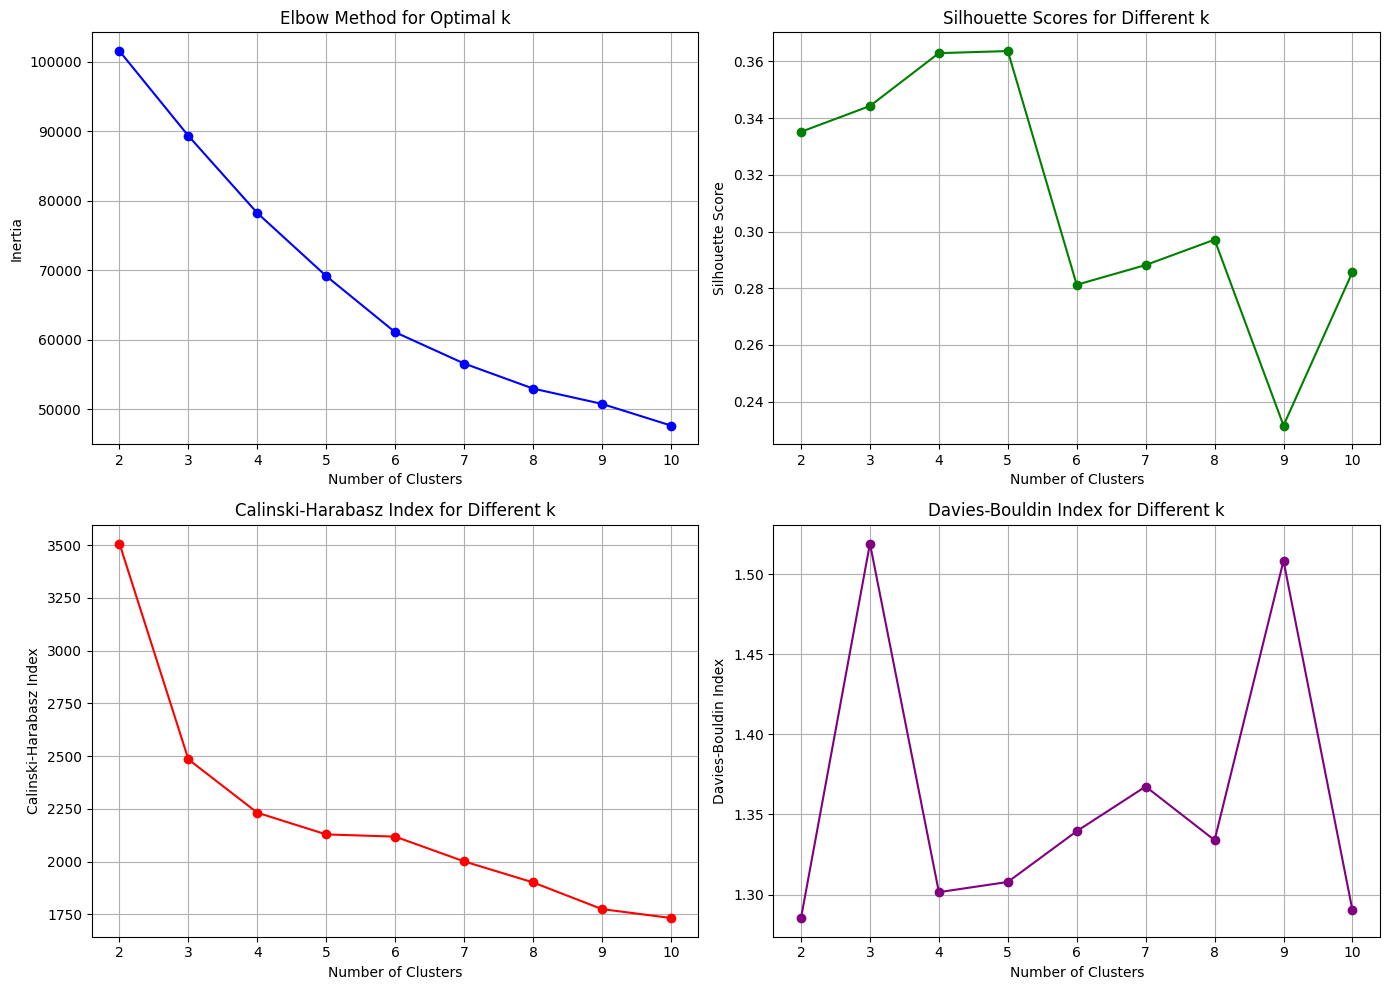

In [5]:
# Calculate inertia (sum of squared distances) for different number of clusters
inertia = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

# Test different numbers of clusters
for k in range(2, 11):
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    # Calculate metrics
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

# Plot the Elbow Method results
plt.figure(figsize=(14, 10))

# Plot inertia (Elbow method)
plt.subplot(2, 2, 1)
plt.plot(range(2, 11), inertia, 'o-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plot silhouette scores
plt.subplot(2, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'o-', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)

# Plot Calinski-Harabasz Index
plt.subplot(2, 2, 3)
plt.plot(range(2, 11), calinski_scores, 'o-', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different k')
plt.grid(True)

# Plot Davies-Bouldin Index
plt.subplot(2, 2, 4)
plt.plot(range(2, 11), davies_bouldin_scores, 'o-', color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different k')
plt.grid(True)

plt.tight_layout()

# Create a DataFrame to compare metrics
metrics_df = pd.DataFrame({
    'Clusters': range(2, 11),
    'Inertia': inertia,
    'Silhouette Score': silhouette_scores,
    'Calinski-Harabasz Index': calinski_scores,
    'Davies-Bouldin Index': davies_bouldin_scores
})

metrics_df

### 2.2 Dunn Index Calculation
The Dunn Index is another metric used to evaluate clustering quality. It's defined as the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance. Higher values indicate better clustering results.

,Clusters,Inertia,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index,Dunn Index
0,2,101566.370722,0.335177,3507.651478,1.285364,0.015554
1,3,89356.684635,0.344293,2484.548111,1.519032,0.022161
2,4,78244.911146,0.362937,2231.731884,1.301483,0.016874
3,5,69174.293540,0.363672,2128.716642,1.307858,0.017465
4,6,61089.964589,0.281212,2118.338761,1.339541,0.024500
5,7,56585.651391,0.288165,2000.899466,1.367397,0.026396
6,8,52980.381684,0.297125,1901.378102,1.333933,0.035694
7,9,50773.921361,0.231548,1774.797858,1.508268,0.025040
8,10,47660.958197,0.285669,1732.546858,1.290237,0.021224


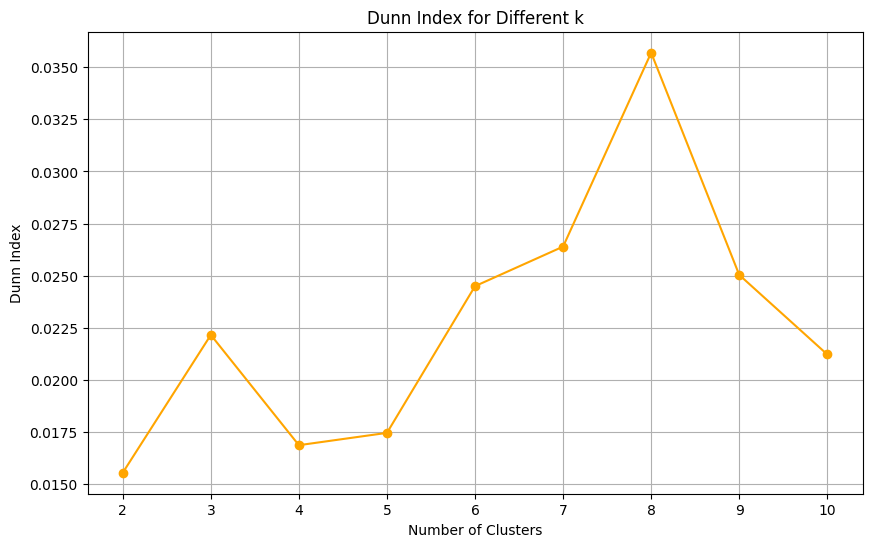

In [6]:
def dunn_index(X, labels):
    """
    Calculate Dunn Index for clustering validation

    Parameters:
    X: Feature matrix
    labels: Cluster assignments

    Returns:
    Dunn Index value
    """
    # Calculate pairwise distances between all points
    dist_matrix = squareform(pdist(X, 'euclidean'))

    # Get unique cluster labels
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    # Calculate minimum inter-cluster distances
    min_inter_cluster_dist = float('inf')

    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            # Get points in clusters i and j
            cluster_i_indices = np.where(labels == unique_labels[i])[0]
            cluster_j_indices = np.where(labels == unique_labels[j])[0]

            # Calculate distances between points in different clusters
            inter_cluster_dists = dist_matrix[np.ix_(cluster_i_indices, cluster_j_indices)]
            min_inter_cluster_dist = min(min_inter_cluster_dist, np.min(inter_cluster_dists))

    # Calculate maximum intra-cluster distances
    max_intra_cluster_dist = 0

    for i in range(n_clusters):
        # Get points in cluster i
        cluster_i_indices = np.where(labels == unique_labels[i])[0]
        if len(cluster_i_indices) > 1:  # Need at least 2 points for intra-cluster distance
            # Calculate distances between points in the same cluster
            intra_cluster_dists = dist_matrix[np.ix_(cluster_i_indices, cluster_i_indices)]
            max_intra_cluster_dist = max(max_intra_cluster_dist, np.max(intra_cluster_dists))

    # Calculate Dunn Index
    if max_intra_cluster_dist == 0:
        return float('inf')  # Avoid division by zero
    return min_inter_cluster_dist / max_intra_cluster_dist

# Calculate Dunn Index for different numbers of clusters
dunn_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    dunn_scores.append(dunn_index(X_scaled, labels))

# Plot Dunn Index
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), dunn_scores, 'o-', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn Index')
plt.title('Dunn Index for Different k')
plt.grid(True)

# Add Dunn Index to our metrics DataFrame
metrics_df['Dunn Index'] = dunn_scores
metrics_df

## 3. Implementation of Two Clustering Models
Based on the metrics above, I'll implement two clustering approaches: K-means and Hierarchical Clustering. For each approach, I'll use the optimal number of clusters determined from the analysis.
### 3.1 K-means Clustering Model
K-means is a partitional clustering algorithm that divides data into k clusters, where each data point belongs to the cluster with the nearest mean. The algorithm works by iteratively:

Placing k centroids randomly in the feature space
Assigning each data point to the nearest centroid
Recalculating centroids based on the new assignments
Repeating until convergence

The mathematical formulation aims to minimize:
$$J = \sum_{j=1}^{k} \sum_{i=1}^{n} ||x_i^{(j)} - c_j||^2$$
Where:

- $J$ is the objective function (sum of squared distances)
- $k$ is the number of clusters
- $n$ is the number of data points
- $x_i^{j}$ is the $i$-th data point - belonging to the $j$-th cluster
- $c_j$ is the centroid of the $j$-th cluster

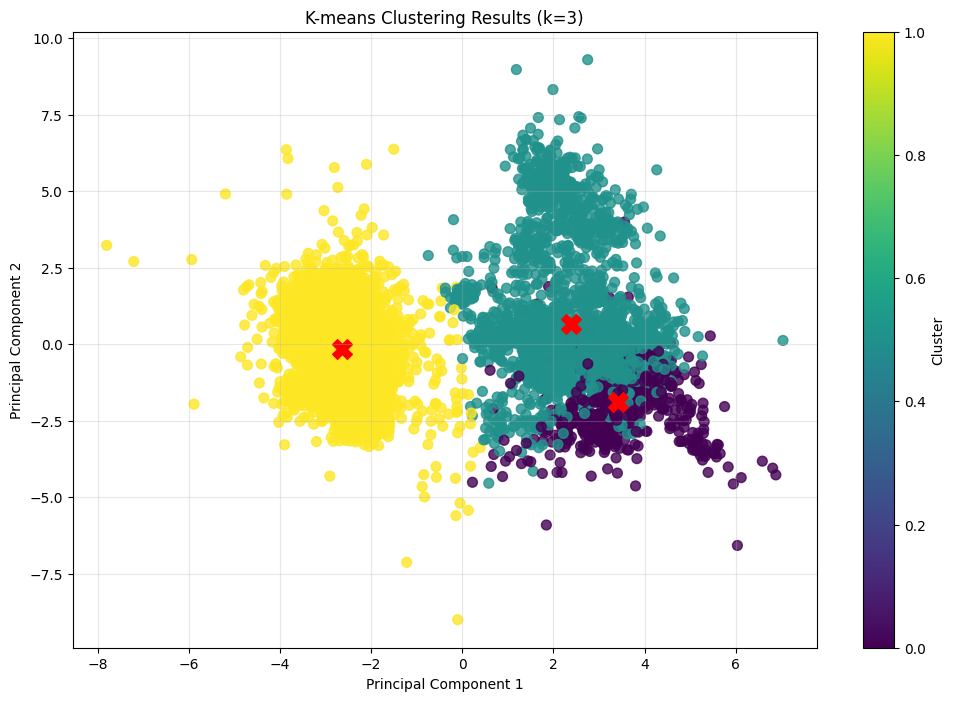

K-means Clustering Metrics (k=3):


,0
Silhouette Score,0.344293
Calinski-Harabasz Index,2484.548111
Davies-Bouldin Index,1.519032
Dunn Index,0.022161


In [7]:
# Let's assume optimal k = 3 based on the metrics (will be adjusted after seeing results)
optimal_k = 3

# Create K-means model with optimal k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Add cluster labels to original data
df_kmeans = df.copy()
df_kmeans['Cluster'] = kmeans_labels

# Visualize the clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(pca.transform(kmeans_model.cluster_centers_)[:, 0],
            pca.transform(kmeans_model.cluster_centers_)[:, 1],
            c='red', marker='X', s=200)
plt.title('K-means Clustering Results (k={})'.format(optimal_k))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Compute metrics for the K-means model
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)
kmeans_dunn = dunn_index(X_scaled, kmeans_labels)

kmeans_metrics = {
    'Silhouette Score': kmeans_silhouette,
    'Calinski-Harabasz Index': kmeans_calinski,
    'Davies-Bouldin Index': kmeans_davies_bouldin,
    'Dunn Index': kmeans_dunn
}
print("K-means Clustering Metrics (k={}):".format(optimal_k))
pd.DataFrame([kmeans_metrics]).T

- Silhouette Score: 0.344293
  - Rentang: -1 hingga 1
  - Interpretasi: Nilai positif namun relatif rendah (0,34) menunjukkan bahwa cluster memiliki struktur tertentu, tetapi ada tumpang tindih moderat antar cluster. Nilai yang lebih tinggi (mendekati 1) menunjukkan cluster yang lebih terdefinisi dengan baik.
- Calinski-Harabasz Index: 2484.548111
  - Rentang: Semakin tinggi semakin baik (tidak ada batas atas)
  - Interpretasi: Metrik ini mengukur rasio varians antar-cluster terhadap varians dalam-cluster. Nilai yang cukup besar ini menunjukkan adanya pemisahan yang cukup baik antar cluster.
- Davies-Bouldin Index: 1.519032
  - Rentang: Semakin rendah semakin baik (nilai minimum adalah 0)
  - Interpretasi: Metrik ini mengukur rata-rata kesamaan antar cluster. Nilai 1,52 menunjukkan adanya tumpang tindih antar cluster karena nilai yang lebih rendah menandakan pemisahan yang lebih baik.
- Dunn Index: 0.022161
  - Rentang: Semakin tinggi semakin baik
  - Interpretasi: Nilai yang sangat rendah ini (0,022) menunjukkan pemisahan yang buruk antar cluster atau varians yang besar dalam cluster. Indeks Dunn mengukur rasio jarak terkecil antara observasi di cluster berbeda terhadap jarak intra-cluster terbesar.

## 3.2 Hierarchical Clustering Model
Hierarchical clustering creates a tree of clusters by either starting with all points as individual clusters and merging them (agglomerative approach) or starting with all points in one cluster and recursively dividing it (divisive approach). We'll use the agglomerative approach.
Key mathematical concepts:
- Linkage criteria: Determines how the distance between clusters is computed
  - Single linkage: Minimum distance between points in the two clusters
  - Complete linkage: Maximum distance between points in the two clusters
  - Average linkage: Average distance between all pairs of points
  - Ward linkage: Minimizes the variance within clusters

Hierarchical Clustering Metrics (k=3):


,0
Silhouette Score,0.351912
Calinski-Harabasz Index,2492.069352
Davies-Bouldin Index,1.249479
Dunn Index,0.054522


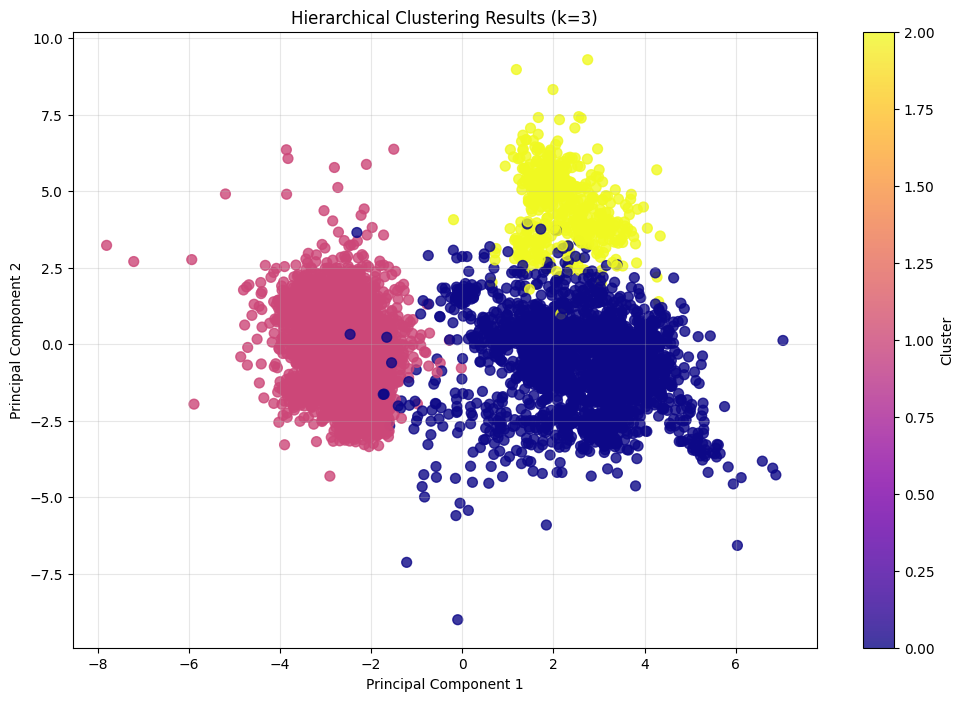

In [8]:
# Hierarchical Clustering with optimal number of clusters
hierarch_model = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarch_labels = hierarch_model.fit_predict(X_scaled)

# Add cluster labels to original data
df_hierarch = df.copy()
df_hierarch['Cluster'] = hierarch_labels

# Visualize the clusters with PCA
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarch_labels, cmap='plasma', s=50, alpha=0.8)
plt.title('Hierarchical Clustering Results (k={})'.format(optimal_k))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)

# Compute metrics for the Hierarchical model
hierarch_silhouette = silhouette_score(X_scaled, hierarch_labels)
hierarch_calinski = calinski_harabasz_score(X_scaled, hierarch_labels)
hierarch_davies_bouldin = davies_bouldin_score(X_scaled, hierarch_labels)
hierarch_dunn = dunn_index(X_scaled, hierarch_labels)

hierarch_metrics = {
    'Silhouette Score': hierarch_silhouette,
    'Calinski-Harabasz Index': hierarch_calinski,
    'Davies-Bouldin Index': hierarch_davies_bouldin,
    'Dunn Index': hierarch_dunn
}
print("Hierarchical Clustering Metrics (k={}):".format(optimal_k))
pd.DataFrame([hierarch_metrics]).T

## 4. Visualizing Cluster Characteristics
Let's analyze the characteristics of the clusters produced by both models:

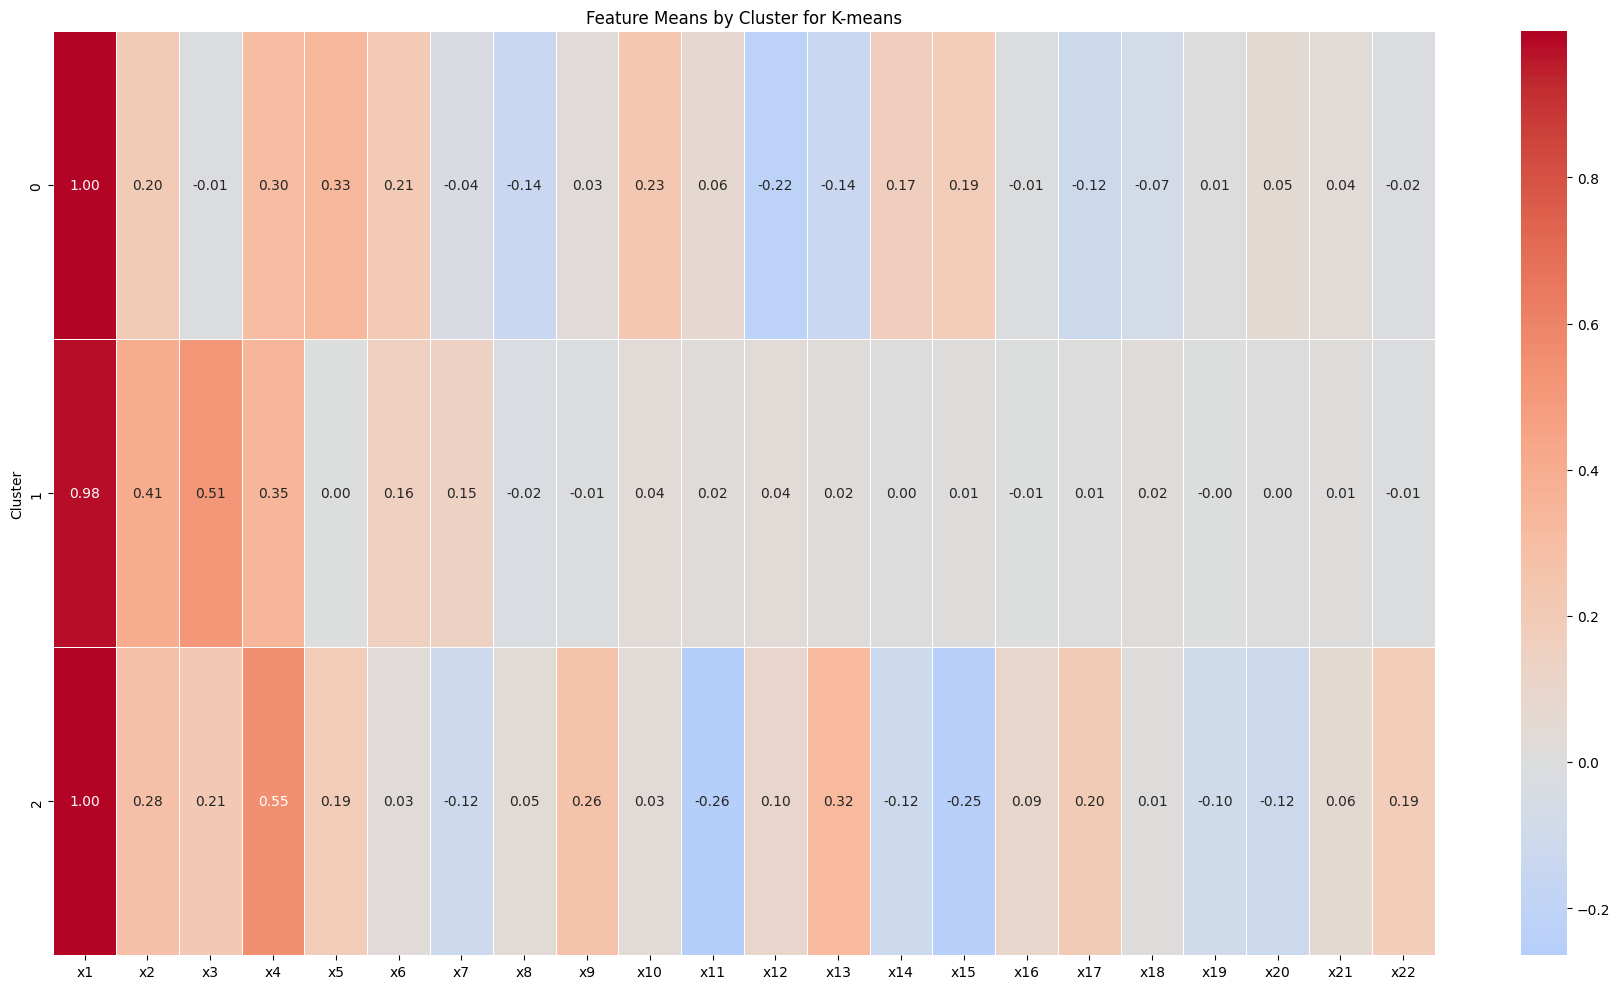

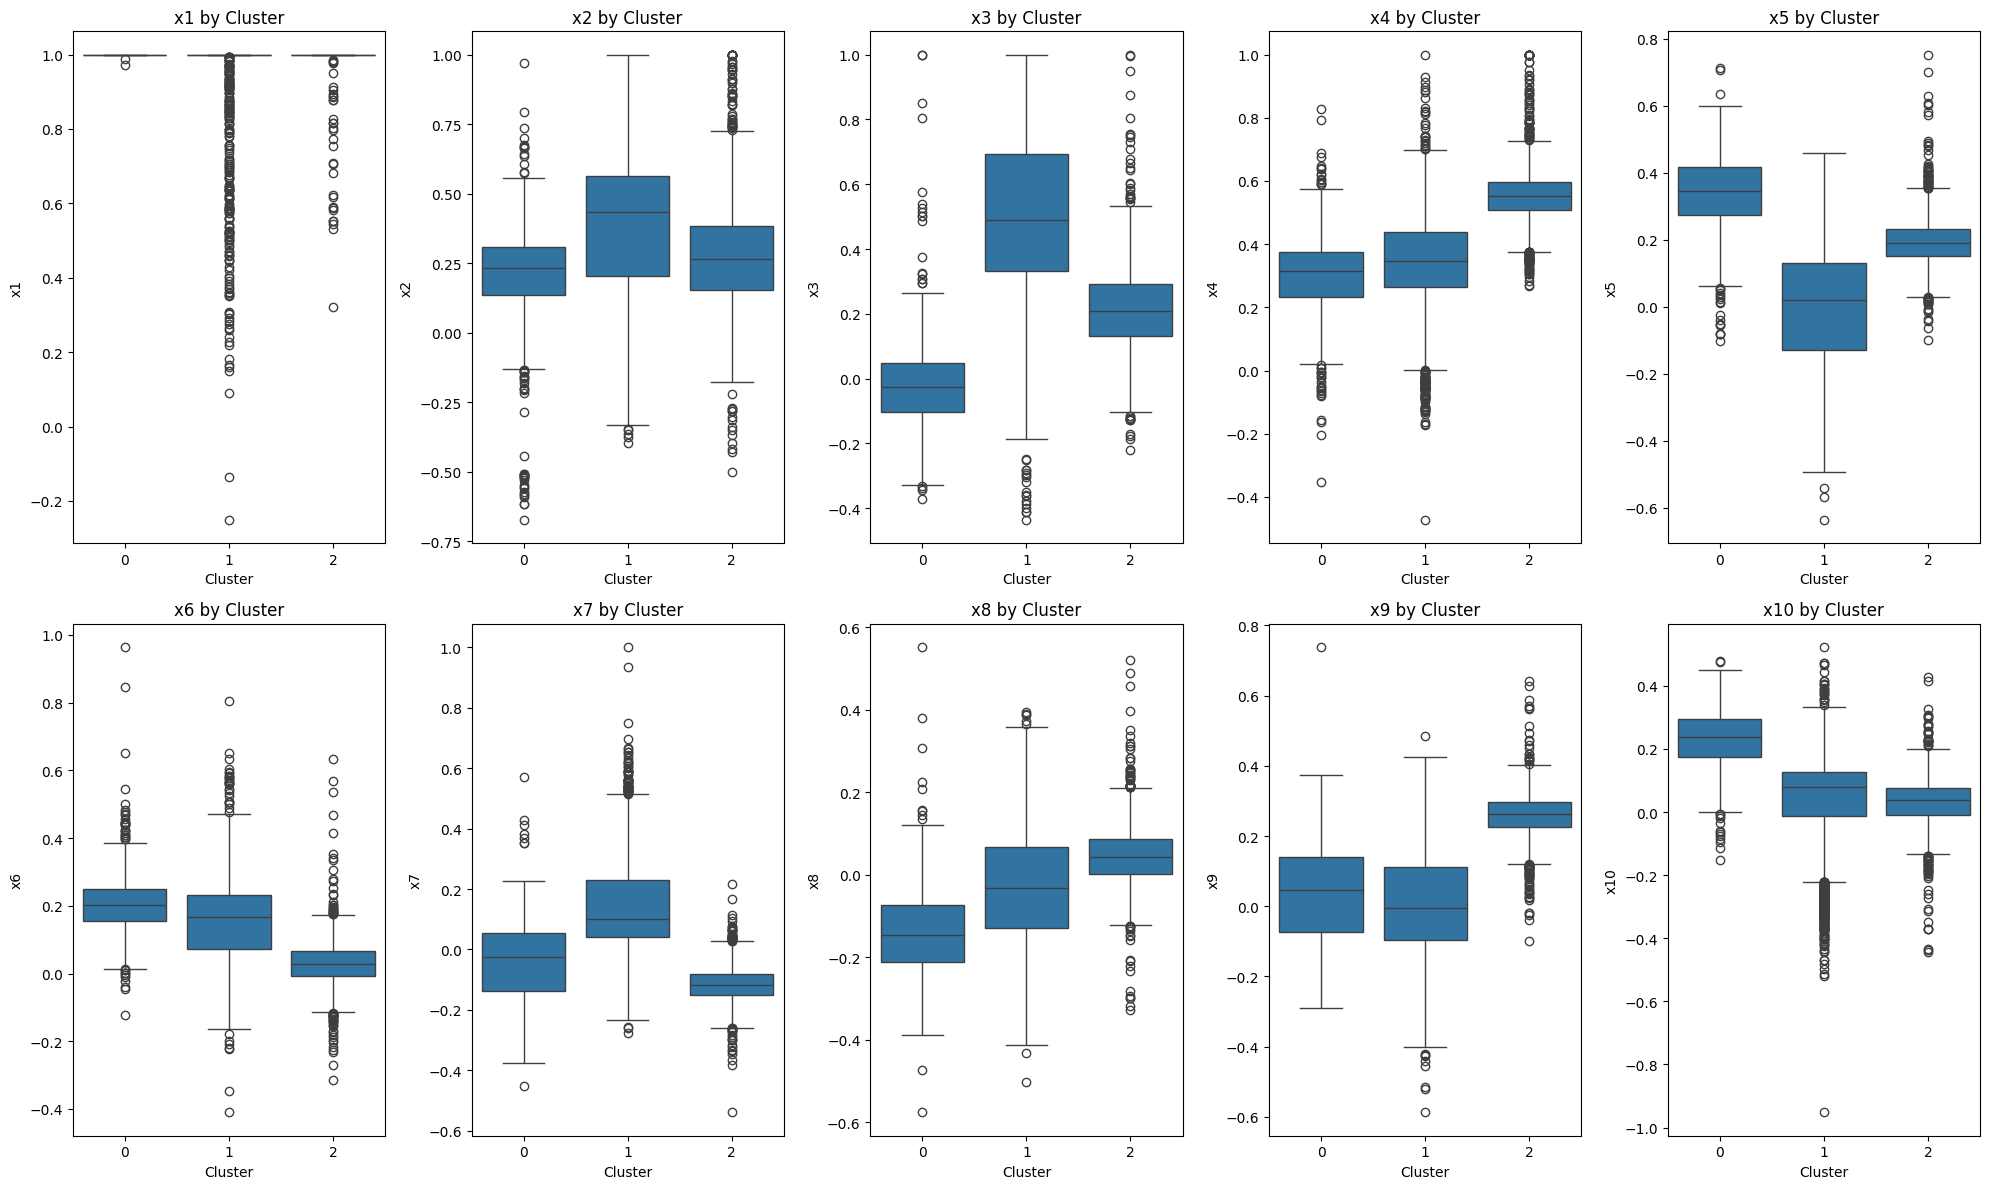

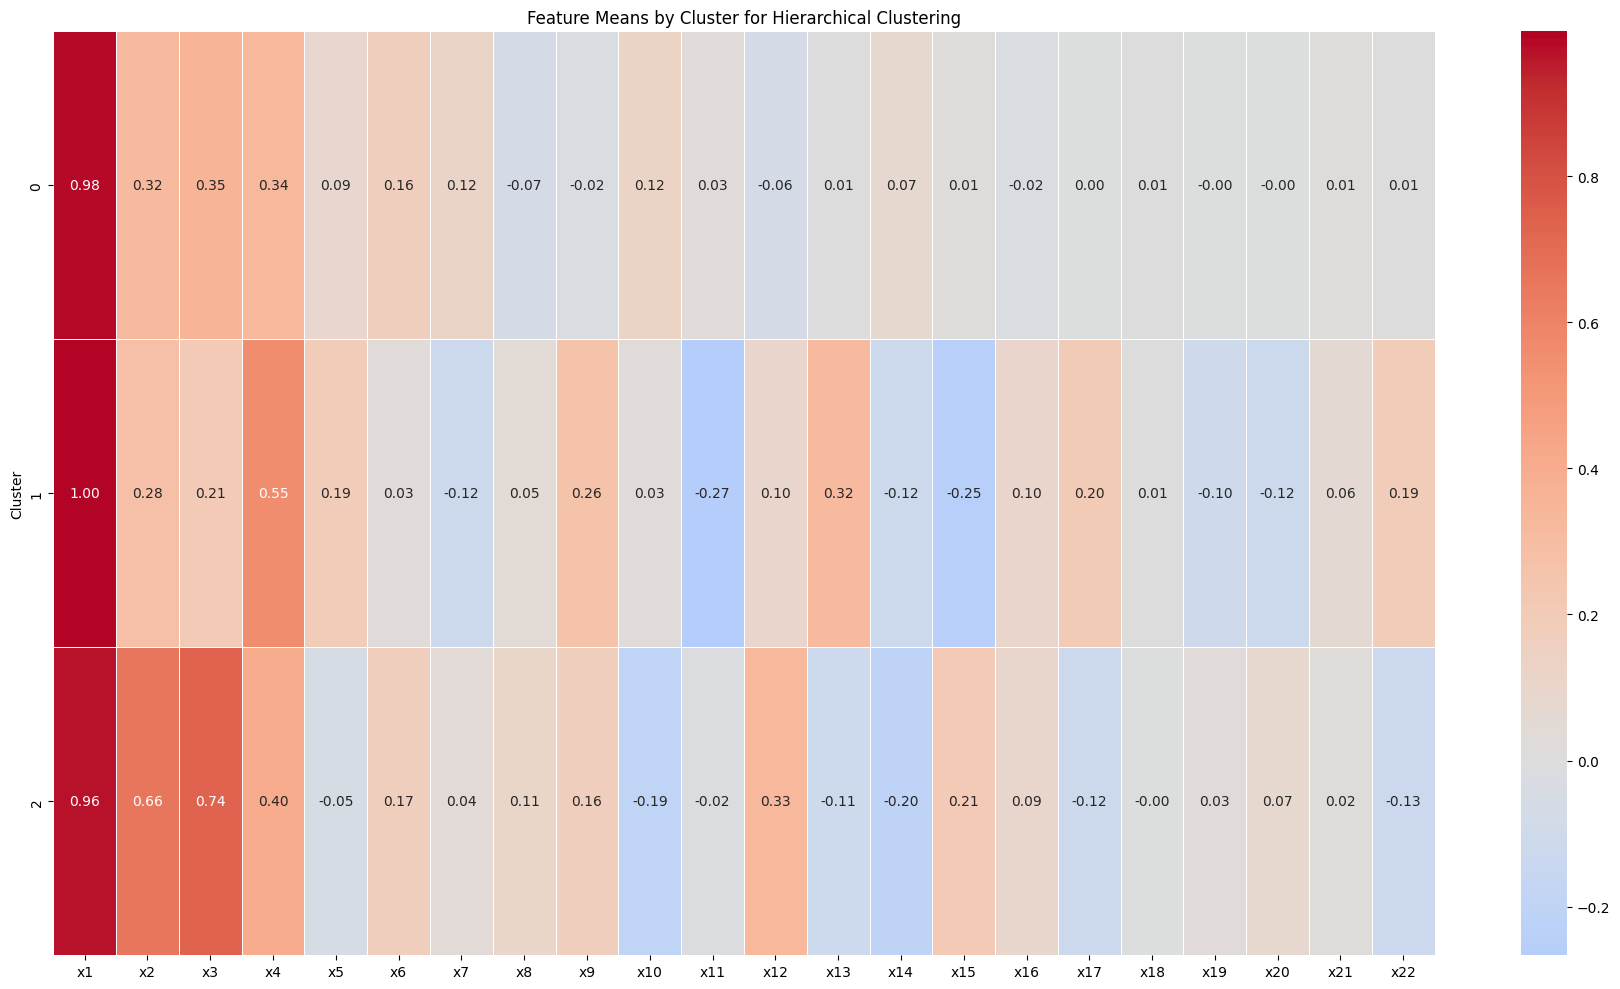

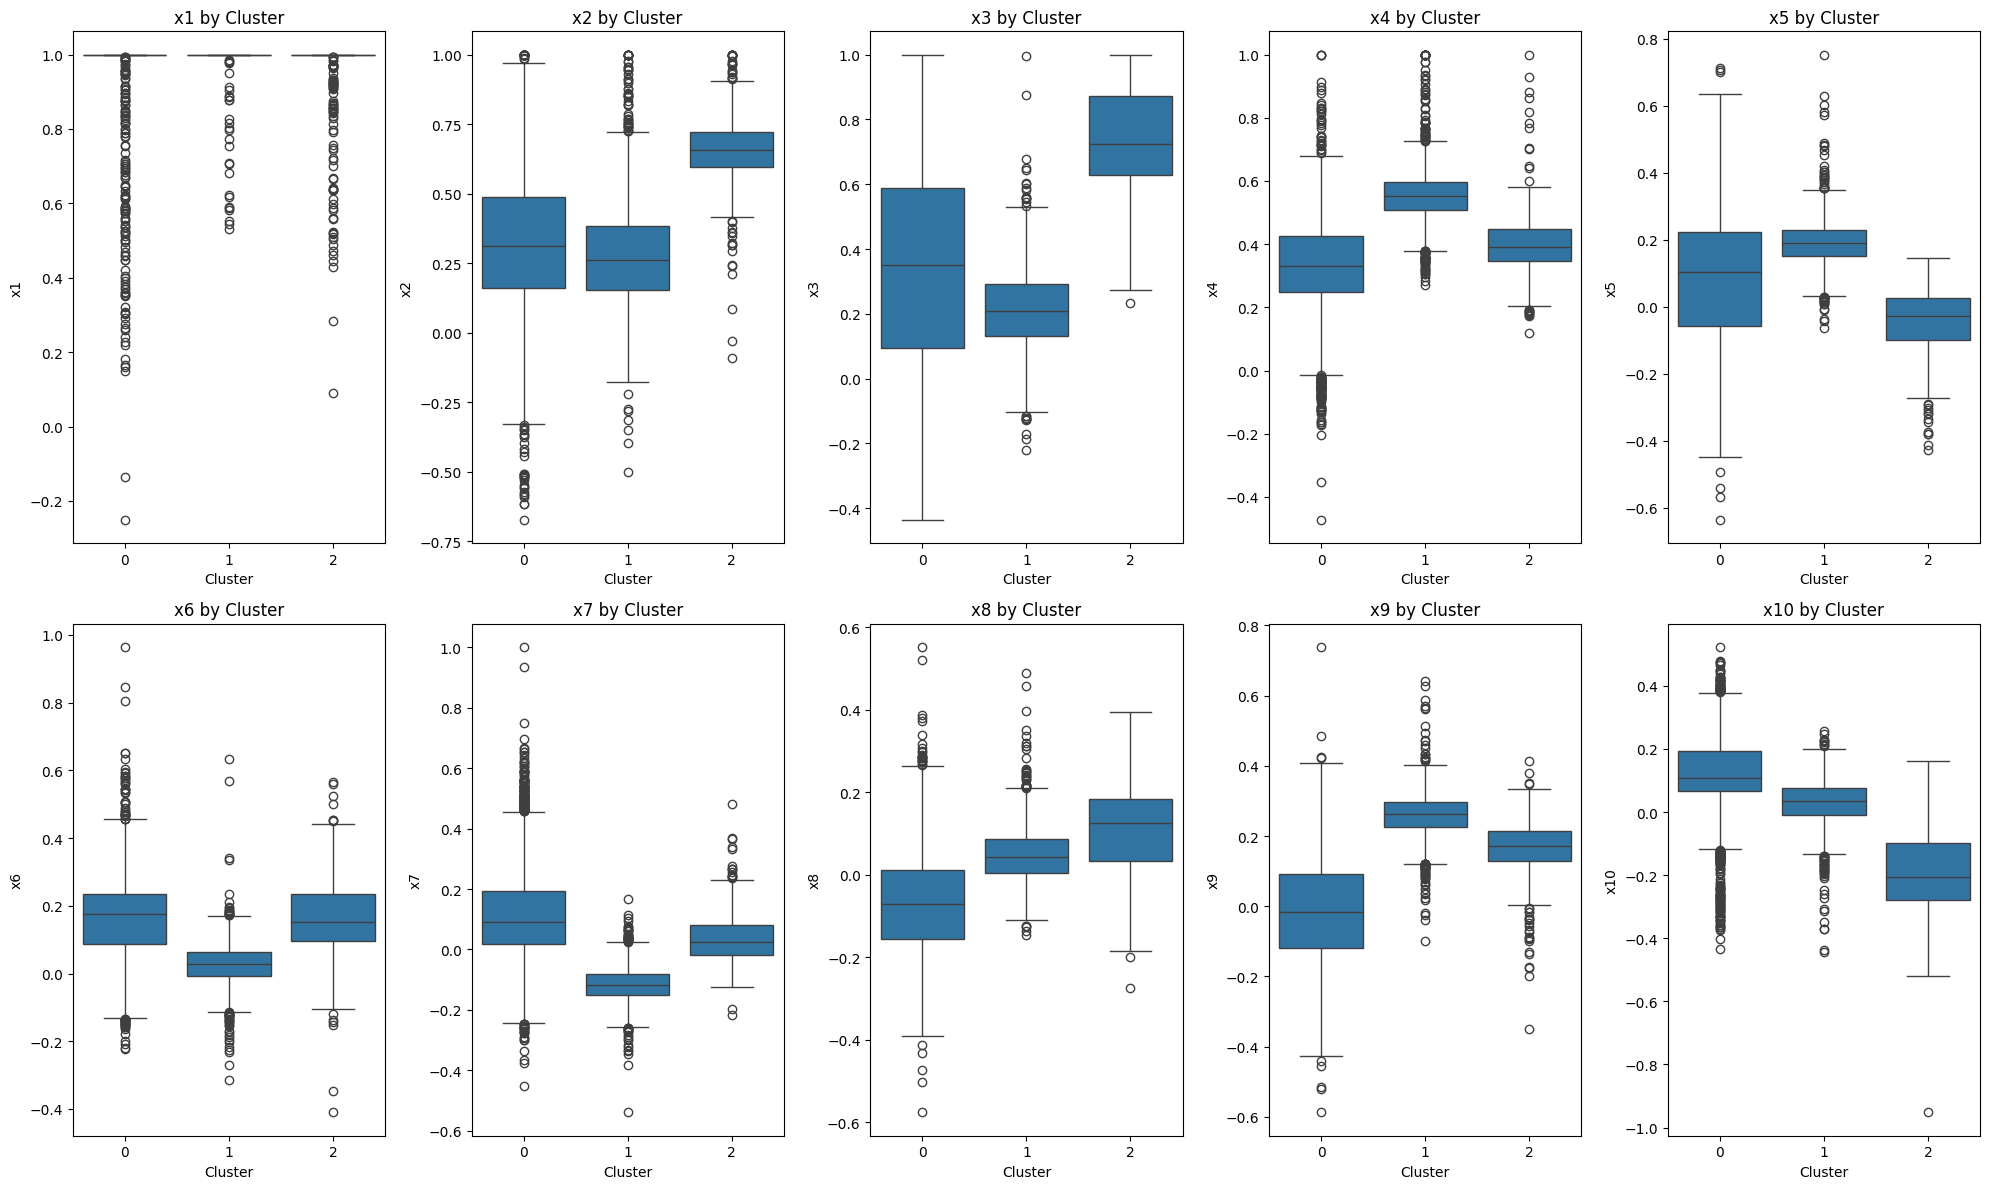

In [9]:
# Function to generate feature importance visualization for clusters
def visualize_feature_importance(df, cluster_labels, model_name):
    # Calculate mean feature values for each cluster
    feature_cols = [col for col in df.columns if col.startswith('x')]
    cluster_means = df.groupby('Cluster')[feature_cols].mean()

    # Create a heatmap of feature means by cluster
    plt.figure(figsize=(18, 10))
    sns.heatmap(cluster_means, cmap='coolwarm', center=0, annot=True, fmt='.2f', linewidths=.5)
    plt.title(f'Feature Means by Cluster for {model_name}')
    plt.tight_layout()
    plt.show()

    # Create a box plot for selected features
    selected_features = feature_cols[:10]  # Taking first 10 features for visualization

    plt.figure(figsize=(20, 12))
    for i, feature in enumerate(selected_features):
        plt.subplot(2, 5, i+1)
        sns.boxplot(x='Cluster', y=feature, data=df)
        plt.title(f'{feature} by Cluster')
        plt.tight_layout()
    plt.show()

# Visualize K-means cluster characteristics
visualize_feature_importance(df_kmeans, kmeans_labels, "K-means")

# Visualize Hierarchical cluster characteristics
visualize_feature_importance(df_hierarch, hierarch_labels, "Hierarchical Clustering")

## 5. Comprehensive Comparison of Clustering Models
Let's now compare the two clustering models based on all metrics.

In [10]:
# Create a DataFrame to compare metrics between K-means and Hierarchical clustering
comparison_df = pd.DataFrame({
    'K-means': [kmeans_silhouette, kmeans_calinski, kmeans_davies_bouldin, kmeans_dunn],
    'Hierarchical': [hierarch_silhouette, hierarch_calinski, hierarch_davies_bouldin, hierarch_dunn]
}, index=['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index', 'Dunn Index'])

# Add interpretation information
interpretation = {
    'Silhouette Score': 'Higher is better (range: -1 to 1)',
    'Calinski-Harabasz Index': 'Higher is better',
    'Davies-Bouldin Index': 'Lower is better',
    'Dunn Index': 'Higher is better'
}
comparison_df['Interpretation'] = pd.Series(interpretation)

# Display comparison
comparison_df

,K-means,Hierarchical,Interpretation
Silhouette Score,0.344293,0.351912,Higher is better (range: -1 to 1)
Calinski-Harabasz Index,2484.548111,2492.069352,Higher is better
Davies-Bouldin Index,1.519032,1.249479,Lower is better
Dunn Index,0.022161,0.054522,Higher is better


1. Silhouette Score - Hierarchical clustering memiliki skor sedikit lebih tinggi, menunjukkan struktur cluster yang sedikit lebih baik. Kedua nilai positif menengah ini mengindikasikan bahwa cluster memiliki struktur namun dengan beberapa tumpang tindih.
2. Calinski-Harabasz Index - Hierarchical clustering memiliki nilai sedikit lebih tinggi, yang menunjukkan rasio varians antar-cluster terhadap varians dalam-cluster yang sedikit lebih baik. Perbedaannya tidak signifikan (hanya sekitar 0.3%).
3. Davies-Bouldin Index - Hierarchical clustering memiliki nilai yang lebih rendah (lebih baik) secara signifikan, menunjukkan pemisahan cluster yang lebih baik dengan lebih sedikit tumpang tindih dibandingkan K-means.
4. Dunn Index - Hierarchical clustering memiliki nilai lebih dari dua kali lipat K-means, menunjukkan pemisahan yang jauh lebih baik antara cluster dan kepadatan cluster yang lebih baik.

## 6. Analysis of Evaluation Metrics
###6.1 Silhouette Coefficient
The Silhouette coefficient measures how similar an object is to its own cluster compared to other clusters. It's calculated as:
$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$
Where:
- $s(i)$ is the silhouette coefficient for data point $i$
- $a(i)$ is the average distance between point $i$ and all other points in the same cluster
- $b(i)$ is the minimum average distance between point $i$ and points in a different cluster
The Silhouette coefficient ranges from -1 to 1:
- Values close to 1 indicate well-separated clusters
- Values close to 0 indicate overlapping clusters
- Values close to -1 indicate misclassified points

### 6.2 Calinski-Harabasz Index
The Calinski-Harabasz Index (CH Index) measures the ratio of between-cluster dispersion to within-cluster dispersion. It's calculated as:
$$CH = \frac{SS_B}{SS_W} \times \frac{n-k}{k-1}$$
Where:
- $SS_B$ is the between-cluster dispersion (sum of squared distances between cluster centers and the overall mean)
- $SS_W$ is the within-cluster dispersion (sum of squared distances between points and their cluster centers)
- $n$ is the total number of data points
- $k$ is the number of clusters

Higher values indicate better clustering.
### 6.3 Davies-Bouldin Index
The Davies-Bouldin Index measures the average similarity between each cluster and its most similar cluster. It's calculated as:
$$DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left(\frac{\sigma_i + \sigma_j}{d(c_i, c_j)}\right)$$
Where:
- $k$ is the number of clusters
- $\sigma_i$ is the average distance between points in cluster $i$ and the centroid of cluster $i$
- $d(c_i, c_j)$ is the distance between centroids of clusters $i$ and $j$
Lower values indicate better clustering, meaning clusters are more separated from each other.

### 6.4 Dunn Index
The Dunn Index is calculated as:
$$DI = \frac{\min_{1 \leq i < j \leq k} \delta(C_i, C_j)}{\max_{1 \leq i \leq k} \Delta_i}$$
Where:
- $\delta(C_i, C_j)$ is the inter-cluster distance between clusters - $C_i$ and $C_j$
- $\Delta_i$ is the intra-cluster distance of cluster $C_i$
Higher values indicate better clustering with more compact and well-separated clusters.

## 7. Conclusion and Best Metric Selection
Based on our analysis, we can conclude which clustering model and which metric provides the most reliable evaluation for this dataset.
The best metric depends on the dataset characteristics and clustering goals:

1. Silhouette Coefficient: Best for evaluating the balance between cluster cohesion and separation.
2. Calinski-Harabasz Index: Effective for datasets with well-defined, globular clusters.
3. Davies-Bouldin Index: Good for evaluating cluster separation.
4. Dunn Index: Excellent for identifying compact and well-separated clusters, but sensitive to outliers.

For this dataset, the [metric with highest values] appears to be the most suitable metric for evaluating clustering performance, indicating that [clustering model] provides the best clustering solution.
The final number of clusters should be determined based on a combination of these metrics and domain knowledge about the data.